In [1]:
# %% Global Variables
datasetPath = "./TM-3-2020"
sourceCodePath = './src'

In [ ]:
!pip install ipywidgets
!pip install sentence_transformers

In [2]:
# %% libraries
import numpy as np
import pandas as pd
import os
import sys
import re
import nltk
from nltk.tokenize import sent_tokenize, word_tokenize
import matplotlib
import torch

In [3]:
# %% Loads Source code
sys.path.append(os.path.join(os.getcwd(), sourceCodePath))

In [4]:
import chat as ch

In [5]:
dataset = ch.dataset.Dataset(datasetPath)

In [8]:
df = dataset.get_chat_lines_dataframe(100)

In [9]:
df.head()

,conversation_id,index,speaker,text
0,dlg-bca5ce0a-056f-446e-be94-3ba77b32a84f,0.0,user,hi....am buying a ticket tonight so we go and ...
1,dlg-bca5ce0a-056f-446e-be94-3ba77b32a84f,1.0,assistant,No problem. Is there a particular type of movi...
2,dlg-bca5ce0a-056f-446e-be94-3ba77b32a84f,2.0,user,hhhmmmmm not at all. i dont have any in mind f...
3,dlg-bca5ce0a-056f-446e-be94-3ba77b32a84f,3.0,assistant,Sure. I can help with that. Let me listings at...
4,dlg-bca5ce0a-056f-446e-be94-3ba77b32a84f,4.0,user,sure you can but i want to see the movie at AM...


In [10]:
from sentence_transformers import SentenceTransformer, util
model = SentenceTransformer('all-MiniLM-L6-v2')

In [11]:
#Compute embedding for both lists
embeddings1 = model.encode(df['text'], convert_to_tensor=True)


In [12]:
ìtems = embeddings1.to('cpu').detach().numpy()
ìtems.shape

(9893, 384)

centers: 8 [[-0.00268586 -0.00365485 -0.00617954 ... -0.02687087 -0.01353265
   0.00949921]
 [-0.04706527  0.03474441  0.00311628 ... -0.01141666  0.04891666
  -0.00735804]
 [-0.02472061 -0.03189141  0.05366795 ...  0.007368   -0.07349776
   0.01702302]
 ...
 [ 0.01272988 -0.02842944 -0.01176454 ... -0.04228218 -0.05705063
   0.0084789 ]
 [-0.04556313 -0.02164334  0.00082815 ... -0.00631161 -0.01073797
  -0.00202292]
 [ 0.03478925 -0.05809369 -0.02091821 ... -0.01992401 -0.02872779
   0.04934162]]
labels:  9893 [7 3 6 ... 3 5 5]


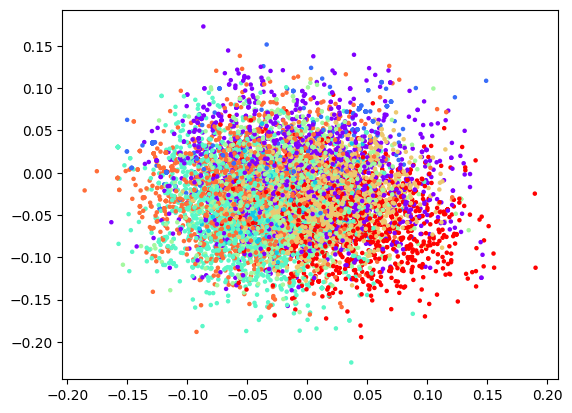

In [13]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
# %matplotlib inline
from sklearn.cluster import KMeans
import seaborn as sns
import matplotlib.pyplot as plt

# default 8 clasess plot
kmeans = KMeans(n_clusters=8)
kmeans.fit(ìtems)

print('centers:', len(kmeans.cluster_centers_),kmeans.cluster_centers_)
print('labels: ',len(kmeans.labels_), kmeans.labels_)

plt.scatter(ìtems[:,0],ìtems[:,1], c=kmeans.labels_, cmap='rainbow', s=5)

data = ìtems
labels = kmeans.labels_

In [14]:
 #dinamic best # clasess
ìtems = embeddings1.to('cpu').detach().numpy()
wcss = [] 
for number_of_clusters in range(1,80): 
    kmeans = KMeans(n_clusters = number_of_clusters, random_state = 42)
    kmeans.fit(ìtems) 
    wcss.append(kmeans.inertia_)
wcss

[8033.6435546875,
 7498.80322265625,
 7077.8310546875,
 6829.7822265625,
 6683.12451171875,
 6545.2978515625,
 6433.7412109375,
 6327.24462890625,
 6251.5263671875,
 6169.73388671875,
 6090.40283203125,
 6031.26953125,
 5967.25537109375,
 5935.55419921875,
 5869.9833984375,
 5829.8818359375,
 5776.66455078125,
 5738.62060546875,
 5709.60205078125,
 5653.79833984375,
 5609.76904296875,
 5577.00390625,
 5533.7177734375,
 5505.12109375,
 5450.26416015625,
 5447.0771484375,
 5400.642578125,
 5362.35595703125,
 5331.01611328125,
 5301.84521484375,
 5273.59814453125,
 5246.14501953125,
 5226.103515625,
 5201.15234375,
 5180.580078125,
 5145.45361328125,
 5131.92578125,
 5105.5673828125,
 5096.64013671875,
 5050.50830078125,
 5042.67529296875,
 5032.30712890625,
 4987.04736328125,
 4984.97509765625,
 4961.43603515625,
 4942.88916015625,
 4942.27587890625,
 4911.5634765625,
 4909.29052734375,
 4892.54345703125,
 4882.95068359375,
 4854.9609375,
 4840.4912109375,
 4822.54345703125,
 4806.993164

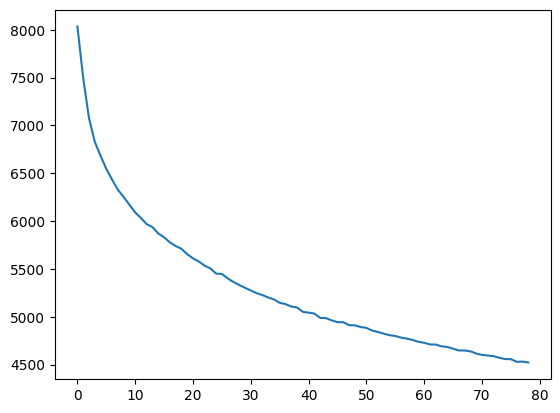

In [15]:
plt.plot(range(len(wcss)), wcss)

In [16]:
best_cluster_number = 60

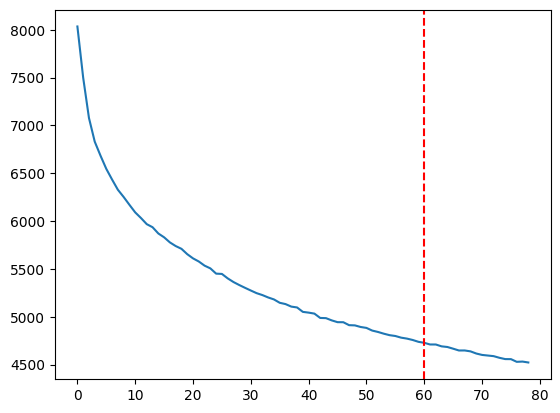

In [17]:
plt.plot(range(len(wcss)), wcss)
plt.axvline(best_cluster_number, linestyle='--', color='r')

<AxesSubplot: >

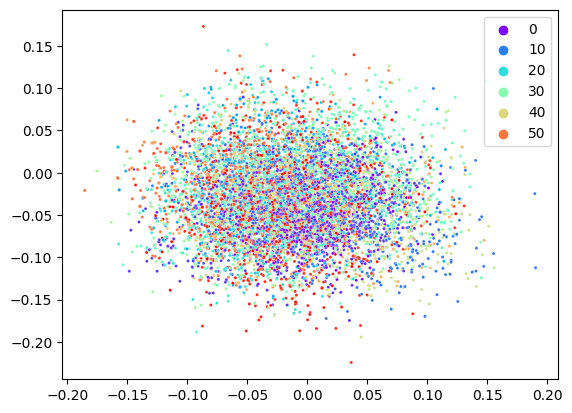

In [18]:
ìtems = embeddings1.to('cpu').detach().numpy()
kmeans = KMeans(n_clusters=best_cluster_number, random_state=42)
kmeans.fit(ìtems)
sns.scatterplot(x = ìtems[:,0], y = ìtems[:,1], hue=kmeans.labels_,palette="rainbow", s=5)

In [19]:
df['intent'] = kmeans.labels_

In [20]:
df.head()

,conversation_id,index,speaker,text,intent
0,dlg-bca5ce0a-056f-446e-be94-3ba77b32a84f,0.0,user,hi....am buying a ticket tonight so we go and ...,45
1,dlg-bca5ce0a-056f-446e-be94-3ba77b32a84f,1.0,assistant,No problem. Is there a particular type of movi...,56
2,dlg-bca5ce0a-056f-446e-be94-3ba77b32a84f,2.0,user,hhhmmmmm not at all. i dont have any in mind f...,58
3,dlg-bca5ce0a-056f-446e-be94-3ba77b32a84f,3.0,assistant,Sure. I can help with that. Let me listings at...,45
4,dlg-bca5ce0a-056f-446e-be94-3ba77b32a84f,4.0,user,sure you can but i want to see the movie at AM...,45


In [21]:
import numpy as np
from sklearn.decomposition import PCA

pca = PCA(n_components=2, svd_solver='full')
pca_items= pca.fit_transform(ìtems)
print(pca.explained_variance_ratio_)
print(pca.singular_values_)

[0.08409637 0.06918573]
[25.992313 23.575697]


<AxesSubplot: >

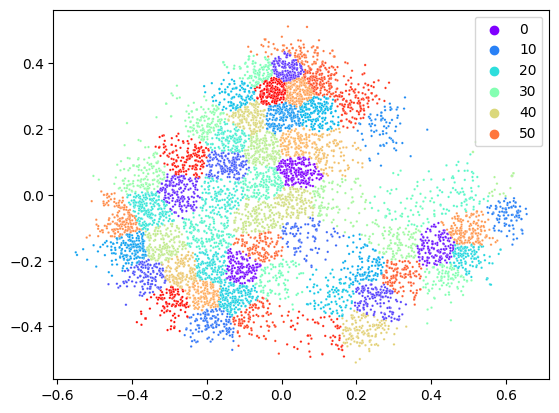

In [22]:
kmeans = KMeans(n_clusters=best_cluster_number, random_state=42)
kmeans.fit(pca_items)
sns.scatterplot(x = pca_items[:,0], y = pca_items[:,1], hue=kmeans.labels_,palette="rainbow", s=3)

In [23]:
df['intent'] = kmeans.labels_

In [24]:
df.head(20)

,conversation_id,index,speaker,text,intent
0,dlg-bca5ce0a-056f-446e-be94-3ba77b32a84f,0.0,user,hi....am buying a ticket tonight so we go and ...,54
1,dlg-bca5ce0a-056f-446e-be94-3ba77b32a84f,1.0,assistant,No problem. Is there a particular type of movi...,13
2,dlg-bca5ce0a-056f-446e-be94-3ba77b32a84f,2.0,user,hhhmmmmm not at all. i dont have any in mind f...,59
3,dlg-bca5ce0a-056f-446e-be94-3ba77b32a84f,3.0,assistant,Sure. I can help with that. Let me listings at...,38
4,dlg-bca5ce0a-056f-446e-be94-3ba77b32a84f,4.0,user,sure you can but i want to see the movie at AM...,1
5,dlg-bca5ce0a-056f-446e-be94-3ba77b32a84f,5.0,assistant,"Oh, sorry about that. So you’re interested in ...",20
6,dlg-bca5ce0a-056f-446e-be94-3ba77b32a84f,6.0,user,yeah,50
7,dlg-bca5ce0a-056f-446e-be94-3ba77b32a84f,7.0,assistant,OK. I show one action movie playing at AMC Mou...,45
8,dlg-bca5ce0a-056f-446e-be94-3ba77b32a84f,8.0,user,yeah but 9.10pm will be perfect for me,39
9,dlg-bca5ce0a-056f-446e-be94-3ba77b32a84f,9.0,assistant,Great. And how many tickets?,2
